<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/milmor/NLP/blob/main/Notebooks/02_SVM.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>
  </td>
</table>

# SVM

In [1]:
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np

In [2]:
X = [[-1, 2], [-1, 1], [-2, 1], [1, 1], [2, 1], [3, 3]]
X = np.array(X)
Y = [-1, -1, -1, 1, 1, 1]
clf = svm.SVC(kernel='linear')
clf.fit(X, Y)

SVC(kernel='linear')

In [3]:
clf.predict([[2., 2.]])

array([1])

In [4]:
clf.support_vectors_, clf.classes_

(array([[-1.,  1.],
        [ 1.,  1.]]),
 array([-1,  1]))

In [5]:
# get number of support vectors for each class
clf.n_support_

array([1, 1], dtype=int32)

In [6]:
# clf.dual_coef_[i] = Y[i] * alphas[i]
clf.dual_coef_, clf.intercept_

(array([[-0.5,  0.5]]), array([-0.]))

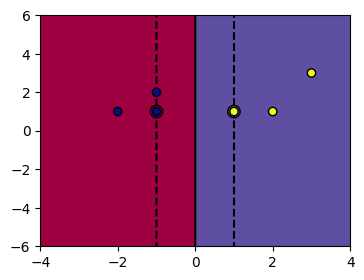

In [7]:
# get the separating hyperplane
w = clf.coef_[0] + 1e-6
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]


margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
            facecolors='none', zorder=10, edgecolors='k')
plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.plasma,
            edgecolors='k')

plt.axis('tight')
x_min = -4
x_max = 4
y_min = -6
y_max = 6

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Spectral)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)


plt.show()